# First look:

Task:
- We want a vessel containing some material/chemical with high purity/yields?

Modules:
- Reaction
    - Do a chemical reaction to get a material/chemical
    * [More Info](#Reaction-bench-deeper-dive)
- Extraction
    - Use solutes to purify your material/chemical
- Distillation
    - Use boiling to purify your material/chemical further
- Characterization
    - Run tests to see what is actually in your output vessel
    
    
    
Each module has an agent associated with doing the module task, given instructions

There is a Lab manager agent with the task of giving instructions for each module

# Vessel

- Has a dictionary of materials
- Has a dictionady of solutes
- Has event queue

In [1]:
class dum:
    def __init__(self,string):
        self.s=string
    def __str__(self):return self.s
    def __repr__(self):return self.s
    
material_dict = {'H2O': [dum("H2O"), 100, 'mol'], 'C6H14': [dum("C6H14"), 100], 'Na': [dum("Na"), 1.0], 'Cl': [dum("Cl"), 1.0]}

# Easy to read display

I think there is some value in making things easy to read instead of having to look at constructors like in the first example
I implemented a quick way to show off materials/solutes

In [2]:
import pandas as pd
import numpy as np
from IPython import display
Display = display.display

def display_materials(material_dict,include_zeros=False):
    table = pd.DataFrame.from_dict(material_dict, orient="index",columns = ["Material","Amount","Unit"])
    print("Material Dict:")
    if include_zeros:
        display.display(table)
    else:
        display.display(table[table.Amount>0])
    
display_materials(material_dict)

Material Dict:


,Material,Amount,Unit
H2O,H2O,100.0,mol
C6H14,C6H14,100.0,None
Na,Na,1.0,None
Cl,Cl,1.0,None


In [3]:
solute_dict = {'Na': {'H2O': [dum("H2O"), 0.5, 'mol'], 'C6H14': [dum("C6H14"), 0.5, 'mol']},
               'Cl': {'H2O': [dum("H2O"), 0.5, 'mol'], 'C6H14': [dum("C6H14"), 0.5, 'mol']}}



def display_solutes(solute_dict):

    table = pd.DataFrame.from_dict(solute_dict, orient="index")

    renamedic = {str(h) : "[Solvent # Unit]" for h in table.columns}

    table.insert(loc=0, column='Solute', value=table.index)

    table.index=np.arange(len(table.index))

    table.rename(columns=renamedic, inplace = True)
    print("Solute Dict:")
    display.display(table)
    
display_solutes(solute_dict)

Solute Dict:


,Solute,[Solvent # Unit],[Solvent # Unit]
0,Na,"[H2O, 0.5, mol]","[C6H14, 0.5, mol]"
1,Cl,"[H2O, 0.5, mol]","[C6H14, 0.5, mol]"


# Event Queue

- Used to modify the contents of a vessel
- Modifications are passed in as "events"
- Why do we have events=None here:

```python
vessel_1 = vessel.Vessel(label='vessel_1')
vessel_2 = vessel.Vessel(label='vessel_2')

event_1 = ['update material dict', material_dict]
event_2 = ['update solute dict', solute_dict]
event_3 = ['drain by pixel', vessel_2, 100]

# Here we are adding the materials and solutions specified above into our first vessel, and then we pour 100ml
# of this solution from vessel 1 into vessel 2
vessel_1.push_event_to_queue(events=None, feedback=[event_1, event_2, event_3], dt=1)
```

- How do we get layering in the vessel?



# Reaction Bench:

- Recieves input vessel
- Selects reaction from a list of supported reactions
- Controls reaction parameters
- Loop previous two steps until agent says to stop
- returns an output vessel as a file
- How is the desired material/output specified?
    - Read from reaction file along with simulation details (why are these grouped together?)
    - Is there a way to do this without a bunch of file I/O?

# Extraction Bench

- Takes in one input vessel
- Returns a set of output vessels
- Target is represented by a string?
- Need to read the code to see how extraction is actually done
- Can transfer contents into other vessels
- Learn what this means:
    - utilizing specifically selected solutes to demarcate and separate materials
- Multiple vessels are saved as output

# Distillation Bench
- Looks like there is again just one input vessel (verify this)
- string target name
- dQ for maximum heat added?
- Looks like actions are to maintain or add heat, and switch the vessel that contents are boiled into
- Multiple vessels are saved as output

# Characterization Bench

- No modifications to input vessel
- Observations for the lab manager
- Main charactarization technique is spectrometric analysis
    - analyze() is called with vessel, analysis (technique) and something called overlap which isn't touched on yet 
- Outputs are an array which can easily be turned into an observation
- Is the vessel frozen in time during this process?
- Every bench has access to characterization now?

# Lab manager

- Has access to a shelf of vessels not in use
- Uses characterization to determine what is in the vessels
- Is in charge of allocating vessels to benches
- Inputs are the benches (excluding characterization)
- Does the lab manager get any say in the rewards of the individual benches?
- How are desired outcomes input for the manager?


# Questions:

- What is the point of making subclasses for your benches? -> for gym.make use?
- Why isn't reaction benches target also a string (currently looks to be in the input file)

# Reaction bench deeper dive


[Class Diagram](https://cruise.umple.org/umpleonline/umple.php?model=221127h5p7jm7vnbgu)

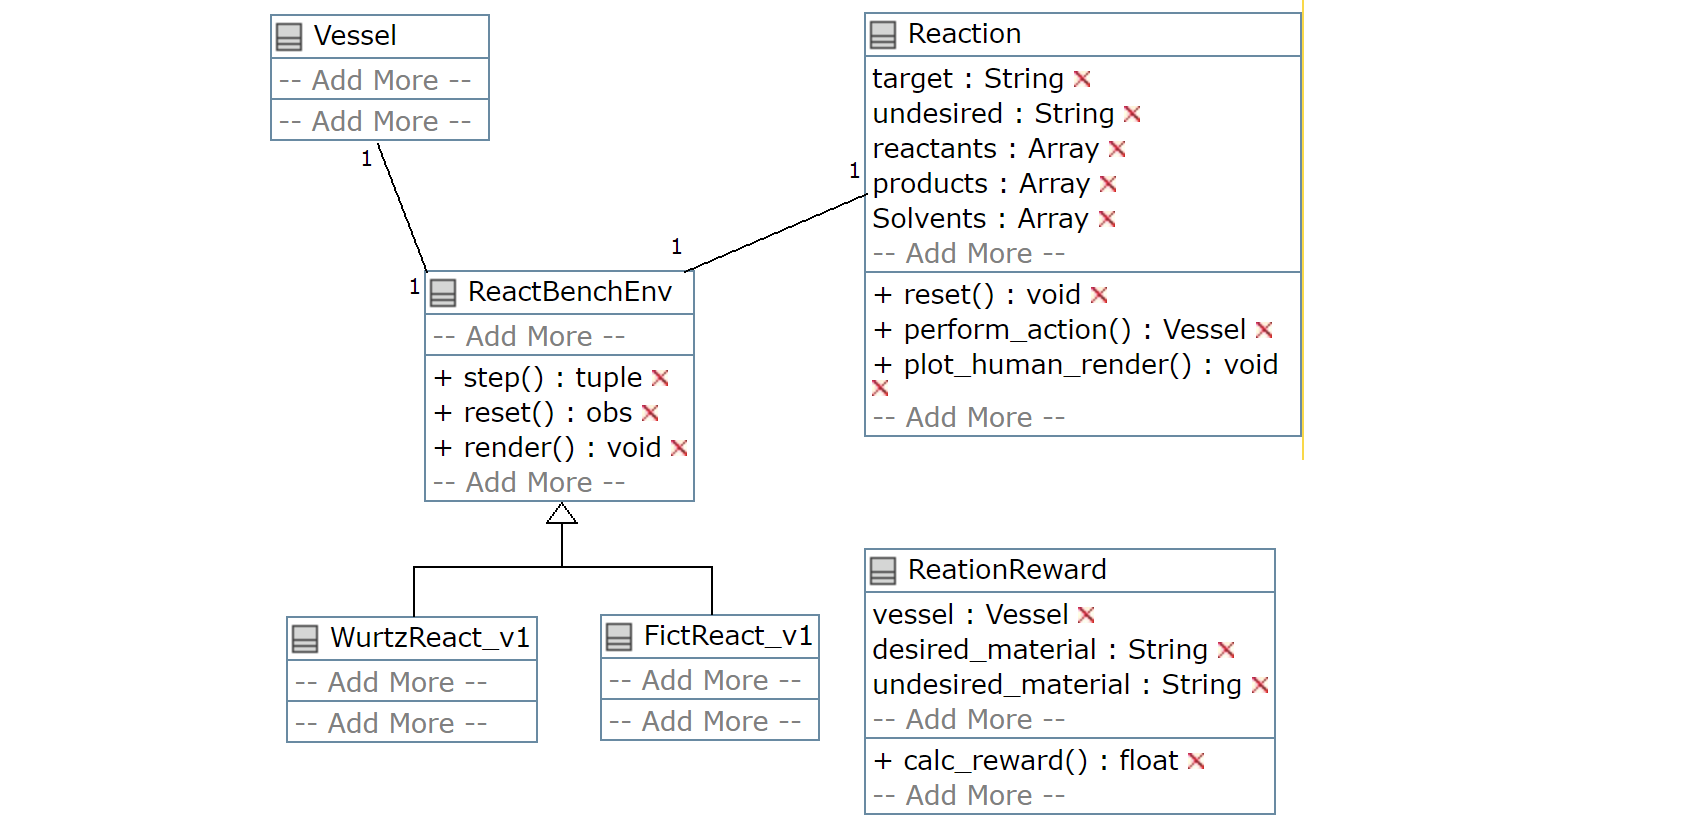

[Next](#Reaction-Bench-Issues)

# Reaction Bench Issues

- Need to tighten gym requirement
    - I had to upgrade my gym install
```
    Installing collected packages: gym-notices, gym
      Attempting uninstall: gym
        Found existing installation: gym 0.21.0
        Uninstalling gym-0.21.0:
          Successfully uninstalled gym-0.21.0
    Successfully installed gym-0.26.2 gym-notices-0.0.8
```

- Check if 0.18,0.15.7 works, once one works I can update requirements -> can create a branch and commit things

- reaction_lesson.ipynb is an empty file (link in reaction bench lesson)
- ```all_envs = envs.registry.all()``` in tutorial doesn't work

```python
# Fixed with this
reg = envs.registry
env_ids = [k for k in reg.keys() if "React" in k]
```
- When using WurtzReact-v1 it asks me to use v2 but trying to open v2 causes a crash

- ```env.render(mode=render_mode)``` doesn't work 
    - looks like mode has changed to model
- ```env.render()``` only plots graphs on the first call?
    - Fix: ```env._first_render = True```
    - Alt fix: ```%matplotlib notebook```
    - proposed change: let me pass an argument (called redraw maybe?) which forces the render function to make a new plot
    
- FictReact-v1 gives different rewards with the same policy
- ```env.step(action)``` doesn't work when using a gym.make() constructed environment [code](#Is-env.step()-broken?)

[Back](#Reaction-bench-deeper-dive) [Next](#Wurtz-Setup) 

In [4]:
import chemistrylab,time

In [5]:
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
import gym
import numpy as np
from gym import envs

# Fixed with this
reg = envs.registry
env_ids = [k for k in reg.keys() if "React" in k]


print(env_ids)
env = gym.make('WurtzReact-v1')
render_mode = "human"
action_set = ['Temperature', 'Volume', "1-chlorohexane", "2-chlorohexane", "3-chlorohexane", "Na"]

assert len(action_set) == env.action_space.shape[0]

['WurtzReact-v1', 'GenWurtzReact-v1', 'FictReact-v1', 'FictReact-v2', 'DecompReact-v0', 'WurtzReact-v2', 'ODETestReact-v0']


C:\Users\sprag\anaconda3\envs\pytorch\lib\site-packages\gym\envs\registration.py:556: UserWarning: WARN: The environment WurtzReact-v1 is out of date. You should consider upgrading to version `v2`.
  f"The environment {id} is out of date. You should consider "


In [6]:
dir(env.env.env.env)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_first_render',
 '_np_random',
 '_prepare_materials',
 '_prepare_solutes',
 '_prepare_vessel',
 '_update_state',
 '_validate_parameters',
 'action_space',
 'char_bench',
 'close',
 'done',
 'dt',
 'full_render',
 'human_render',
 'in_vessel_path',
 'initial_in_hand',
 'initial_materials',
 'initial_solvents',
 'max_steps',
 'metadata',
 'n_steps',
 'name',
 'np_random',
 'observation_space',
 'out_vessel_path',
 'plot_data_concentration',
 'plot_data_mol',
 'plot_data_state',
 'reaction',
 'render',
 '

Material Dict:


C:\Users\sprag\anaconda3\envs\pytorch\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
C:\Users\sprag\anaconda3\envs\pytorch\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
C:\Users\sprag\anaconda3\envs\pytorch\lib\site-packages\gym\utils\passive_env_checker.py:196: UserWarning: WARN: The result returned by `env.reset()` wa

,Material,Amount,Unit
DiEthylEther,diethyl ether,4,mol


Solute Dict:


,Solute


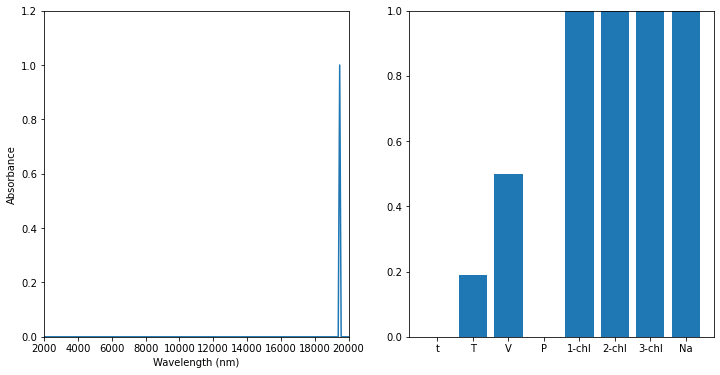

In [7]:
env.reset()
display_materials(env.env.env.env.vessels._material_dict)
display_solutes(env.env.env.env.vessels._solute_dict)
env.render()

# Is env.step() broken?

In [8]:
try:
    env.step([0]*6)
except Exception as e:
    print(e)

not enough values to unpack (expected 5, got 4)


C:\Users\sprag\anaconda3\envs\pytorch\lib\site-packages\gym\utils\passive_env_checker.py:220: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  "Core environment is written in old step API which returns one bool instead of two. "


In [9]:
reg["WurtzReact-v1"].entry_point

'chemistrylab.reaction_bench.reaction_bench_v1:WurtzReact_v1'

# Wurtz Setup

2 1-chlorohexane + 2 Na -> dodecane + 2 NaCl

In [10]:
env2=chemistrylab.reaction_bench.reaction_bench_v1.WurtzReact_v1()
obs = env2.reset()
from matplotlib import pyplot as plt
#plt.plot(obs)
#plt.show()
print(env2.action_space)
obs = env2.reset()

print("Target:",env2.reaction.target)
print("Undesired:",env2.reaction.undesired)
Display(env2.vessels.get_material_table())

Box(0.0, 1.0, (6,), float32)
Target: dodecane
Undesired: 


,Material,Amount,Unit
DiEthylEther,diethyl ether,4,mol


[Back](#Reaction-Bench-Issues) [Next](#Wurtz-Run)

In [11]:
from IPython.display import clear_output
def run_wurtz():
    rew=0
    G=0
    #['Temperature', 'Volume', "1-chlorohexane", "2-chlorohexane", "3-chlorohexane", "Na"]
    obs = env2.reset()
    for x in range(100):
        clear_output(wait=True)
        env2.render()
        print(rew,G)
        if x<4:
            # pour 30% of vial repeatedly
            obs,rew,done,_ = env2.step([0.5,0.5,0.3,0.0,0.0,0.3])
        elif x==4:
            #pour remaining contents
            env2.step([0.5,0.5,1.0,0.0,0.0,1.0])
        else:
            obs,rew,done,_ = env2.step([0.5,0.5,0,0,0,0])
        G+=rew
        if done:
            break

    print(done,G)

# Wurtz Run

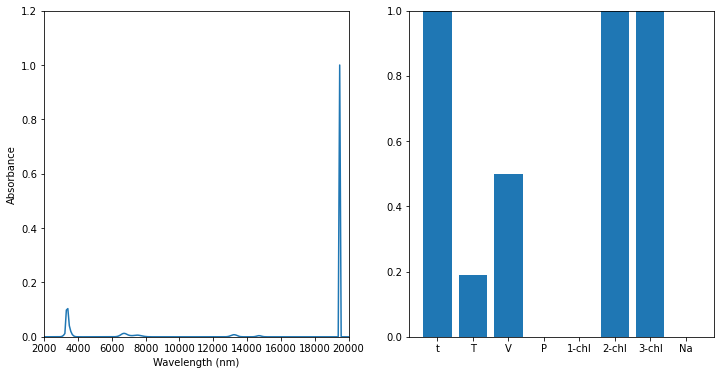

0 0
True 0.3092533779990231


In [12]:
run_wurtz()

[Back](#Wurtz-Setup) [Next](#Wurtz-Output)
# Wurtz Output

Recall, the target was for Wurtz is to create dodecane

In [13]:
Display(env2.vessels.get_material_table())

,Material,Amount,Unit
1-chlorohexane,1-chlorohexane,0.381493,mol
Na,Na,0.381493,mol
dodecane,dodecane,0.309253,mol
NaCl,NaCl,0.618507,mol
DiEthylEther,diethyl ether,4.000000,mol


[Back](#Wurtz-Run) [Next](#Ficticious-Reaction-Setup)

# Ficticious Reaction Setup

In [14]:
reg["FictReact-v1"].entry_point

'chemistrylab.reaction_bench.reaction_bench_v1:FictReact_v1'

In [15]:
env3 = chemistrylab.reaction_bench.reaction_bench_v1.FictReact_v1()
env3.action_space
print("Target:",env3.reaction.target)
print("Undesired:",env3.reaction.undesired)
display_materials(env3.vessels._material_dict)

Target: 
Undesired: E
Material Dict:


,Material,Amount,Unit
H2O,H2O,30,mol


[Back](#Wurtz-Output) [Next](#Reward-Weirdness)


In [16]:
def run_fict(n=3,viz="table"):
    G=np.zeros(n)
    for y in range(n):
        rew=x=done=0
        obs = env3.reset()
        while not done:
            #Policy: At the start, pump in some A,B and mystery substance
            time.sleep(0.1)
            if viz=="table":
                clear_output(wait=True)
                Display(env3.vessels.get_material_table())
            elif viz=="graph":
                clear_output(wait=True)
                env3.render()
            
            if x==0:obs,rew,done,_ = env3.step([0.5,0.5,0.99,0.99,0.0,0.3]+[0.0]*3)
            else:obs,rew,done,_ = env3.step([0.55,0.45]+[0]*7)
            print(y,rew)
            G[y]+=rew
            x+=1
        #Print total return
        print(G)
    return G

# Reward Weirdness
I can get a reward but inconsistently?
- This is because it randomoly decides on a target when none is given

In [ ]:
G = run_fict(n=3,viz="table")

,Material,Amount,Unit
A,A,0.542824,mol
B,B,0.542824,mol
D,D,0.005648,mol
F,F,0.447176,mol
G,G,0.447176,mol
H2O,H2O,30.000000,mol


[Back](#Ficticious-Reaction-Setup)

# Extraction Bench Deeper Dive

In [ ]:
env_keys = envs.registry.keys()
reg = envs.registry
env_ids = [k for k in env_keys if "Extract" in k]
print(env_ids)